## Cost of Living 2022

### The main aim of this project is to  analyse cost of living index over the globe and predict cost of living index based on various given index.

### Data 
Cost of Living Index (Excl. Rent) is a relative indicator of consumer goods prices, including groceries, restaurants, transportation and utilities. Cost of Living Index does not include accommodation expenses such as rent or mortgage. If a city has a Cost of Living Index of 120, it means Numbeo has estimated it is 20% more expensive than New York (excluding rent).

data Source: https://www.kaggle.com/code/bcruise/cost-of-living-index-2022-eda/data

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.pandas.set_option('display.max_columns',None)
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
%matplotlib inline


In [2]:
import chart_studio.plotly as py
import plotly.graph_objects as go
import iplot
import pycountry

In [3]:
FileName= 'F:\ML Projects\CostofLiving\Cost_of_Living_Index_2022.csv'
data=pd.read_csv(FileName, header=[1])
#dataset.to_csv('filename.csv', header = False, index=False)

In [4]:
data=pd.read_csv('filename.csv')

In [5]:
data.head()

Rank      Country  Cost of Living Index  Rent Index  \
0     1  Afghanistan                 20.37        2.72   
1     2      Albania                 35.50        8.47   
2     3      Algeria                 26.87        4.59   
3     4    Argentina                 34.69        7.71   
4     5      Armenia                 33.89       11.61   

   Cost of Living Plus Rent Index  Groceries Index  Restaurant Price Index  \
0                           12.09            14.92                   12.41   
1                           22.83            29.32                   25.82   
2                           16.43            28.82                   14.48   
3                           22.04            28.17                   33.32   
4                           23.45            27.59                   30.55   

   Local Purchasing Power Index  
0                         23.04  
1                         30.19  
2                         24.63  
3                         30.72  
4                         28.86

In [6]:
data.describe().T

count       mean        std    min     25%  \
Rank                            139.0  70.000000  40.269923   1.00  35.500   
Cost of Living Index            139.0  50.188633  20.860222  19.92  34.715   
Rent Index                      139.0  19.291511  15.317726   2.72   9.515   
Cost of Living Plus Rent Index  139.0  35.705324  17.542523  12.09  23.310   
Groceries Index                 139.0  46.637842  20.952229  14.92  31.200   
Restaurant Price Index          139.0  43.444892  24.885969  12.41  25.290   
Local Purchasing Power Index    139.0  46.426259  26.921840   1.45  27.040   

                                  50%      75%     max  
Rank                            70.00  104.500  139.00  
Cost of Living Index            44.68   62.580  146.04  
Rent Index                      13.93   25.070   98.58  
Cost of Living Plus Rent Index  31.26   44.865  123.80  
Groceries Index                 40.22   56.590  148.66  
Restaurant Price Index          34.56   54.925  159.17  
Local Purchasing Power Index    37.22   66.105  118.44

In [7]:
data.isnull().sum()

Rank                              0
Country                           0
Cost of Living Index              0
Rent Index                        0
Cost of Living Plus Rent Index    0
Groceries Index                   0
Restaurant Price Index            0
Local Purchasing Power Index      0
dtype: int64

#### The dataset has no missing values 

In [8]:
data.drop(['Rank'], axis=1, inplace=True)


In [9]:
data.head()

Country  Cost of Living Index  Rent Index  \
0  Afghanistan                 20.37        2.72   
1      Albania                 35.50        8.47   
2      Algeria                 26.87        4.59   
3    Argentina                 34.69        7.71   
4      Armenia                 33.89       11.61   

   Cost of Living Plus Rent Index  Groceries Index  Restaurant Price Index  \
0                           12.09            14.92                   12.41   
1                           22.83            29.32                   25.82   
2                           16.43            28.82                   14.48   
3                           22.04            28.17                   33.32   
4                           23.45            27.59                   30.55   

   Local Purchasing Power Index  
0                         23.04  
1                         30.19  
2                         24.63  
3                         30.72  
4                         28.86

### Distributions of Cost Indexes

In [10]:
import warnings
warnings.filterwarnings('ignore')

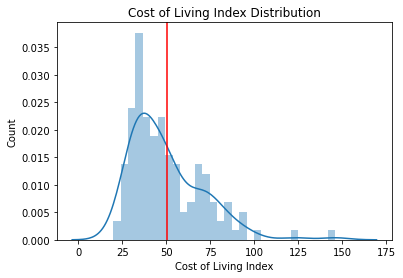

In [11]:
sns.distplot(data['Cost of Living Index'], bins=30)
plt.axvline(data['Cost of Living Index'].mean(), color='red')
plt.xlabel('Cost of Living Index')
plt.ylabel("Count")
plt.title("Cost of Living Index Distribution")
plt.show()

In [12]:
features = [feature for feature in data.columns[2:]]
features

['Rent Index',
 'Cost of Living Plus Rent Index',
 'Groceries Index',
 'Restaurant Price Index',
 'Local Purchasing Power Index']

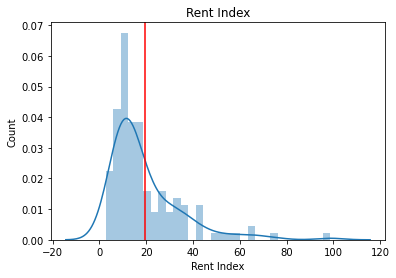

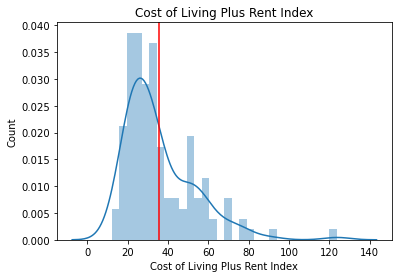

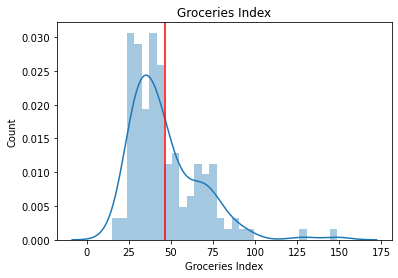

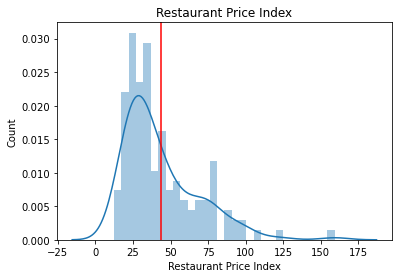

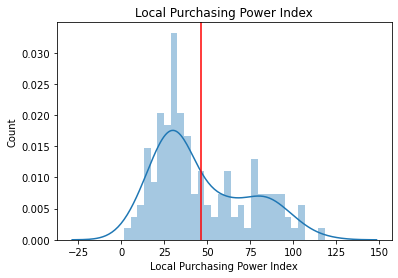

In [13]:
for feature in features:
    sns.distplot(data[feature], bins=30)
    plt.axvline(data[feature].mean(), 
            color='red')
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

### Top 10 countries with the highest cost of living index

In [14]:
features = [feature for feature in data.columns[1:]]
features

['Cost of Living Index',
 'Rent Index',
 'Cost of Living Plus Rent Index',
 'Groceries Index',
 'Restaurant Price Index',
 'Local Purchasing Power Index']

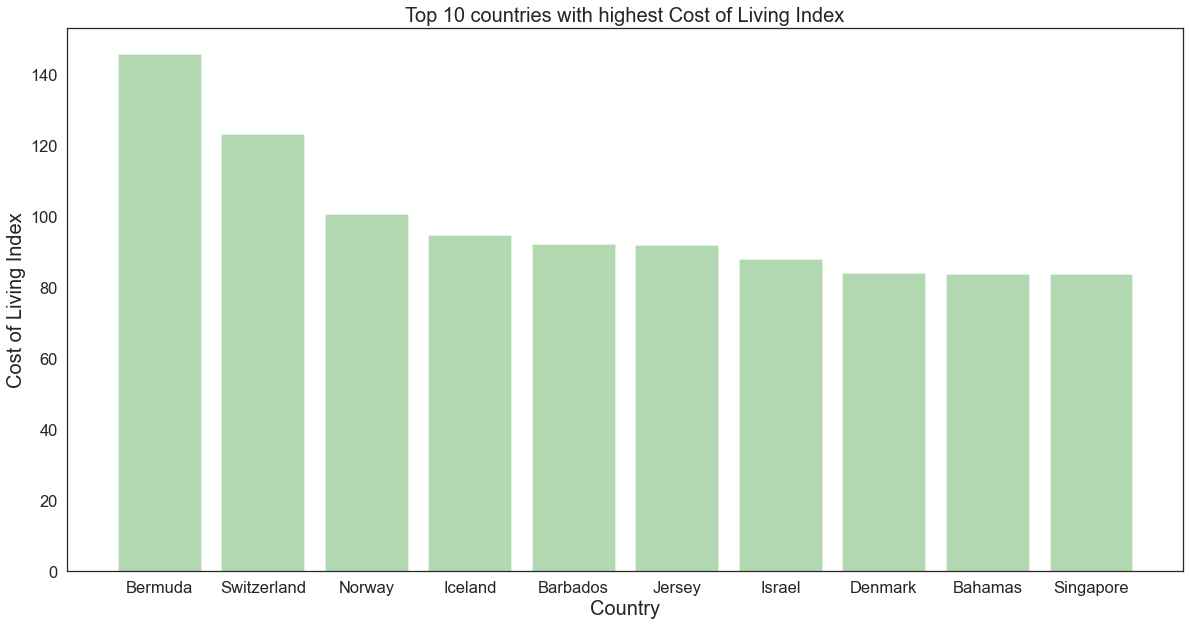

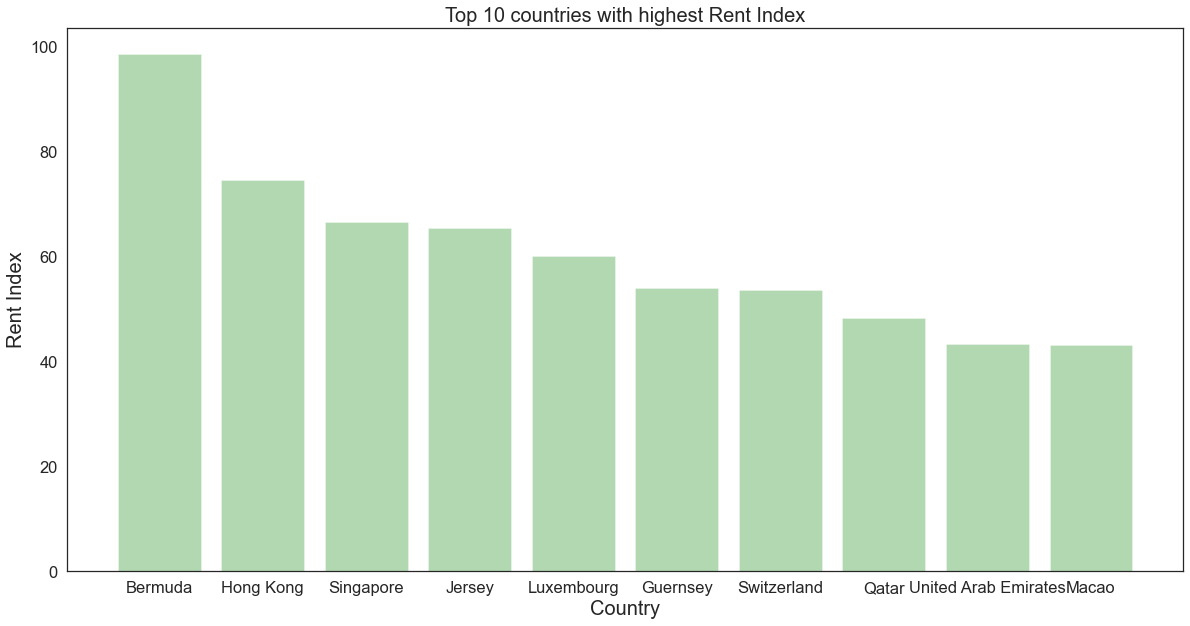

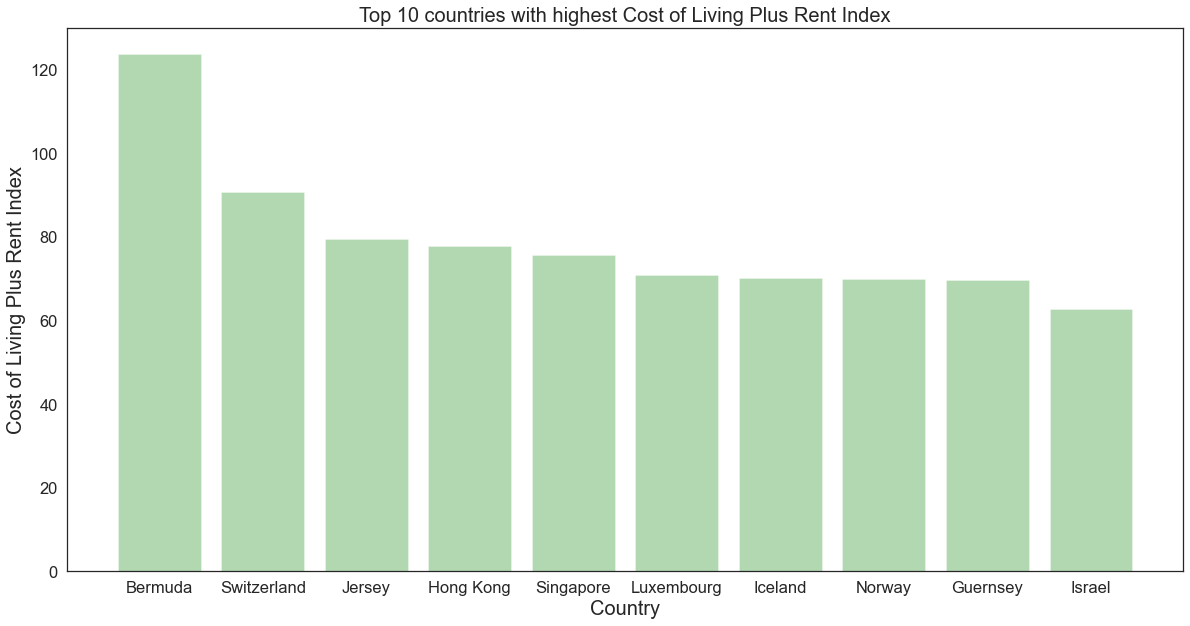

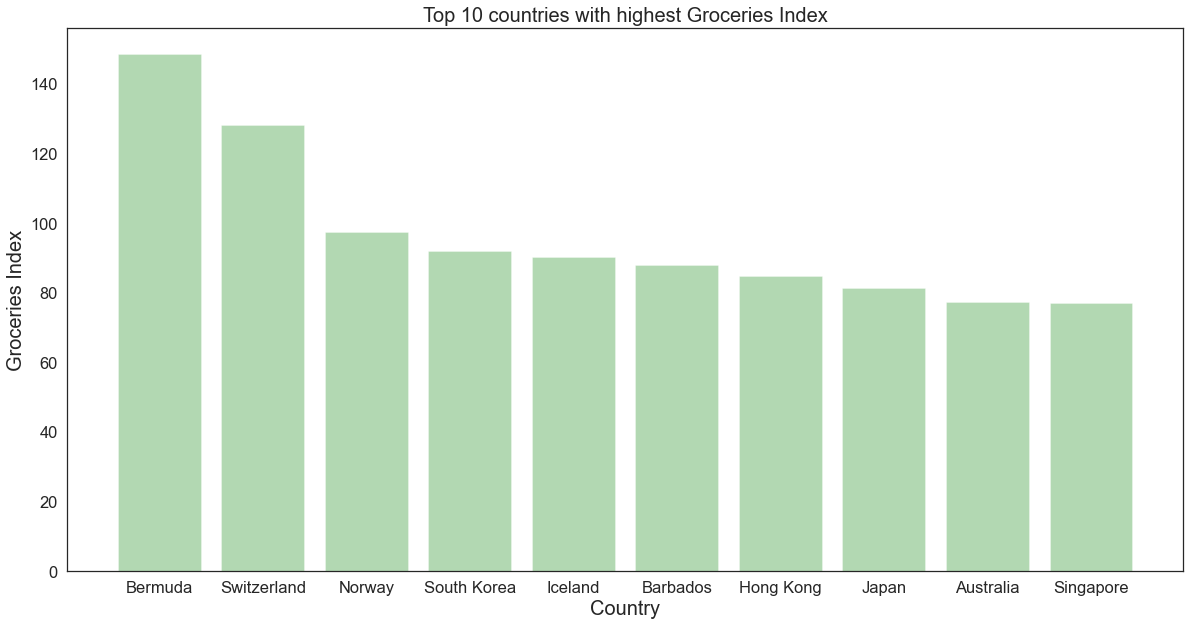

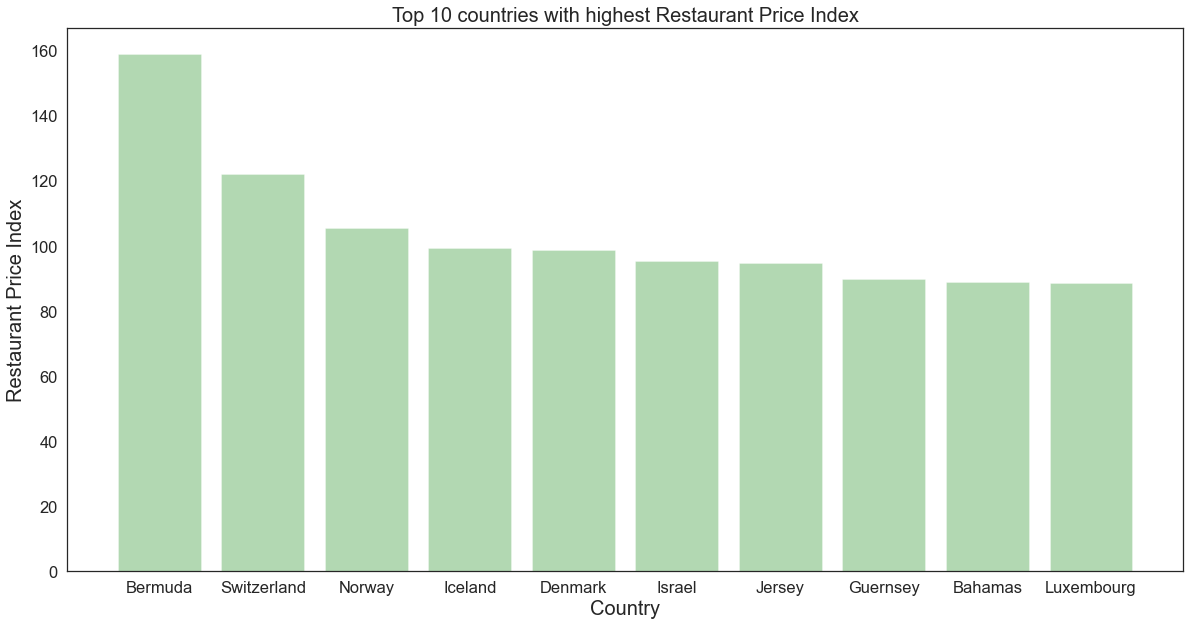

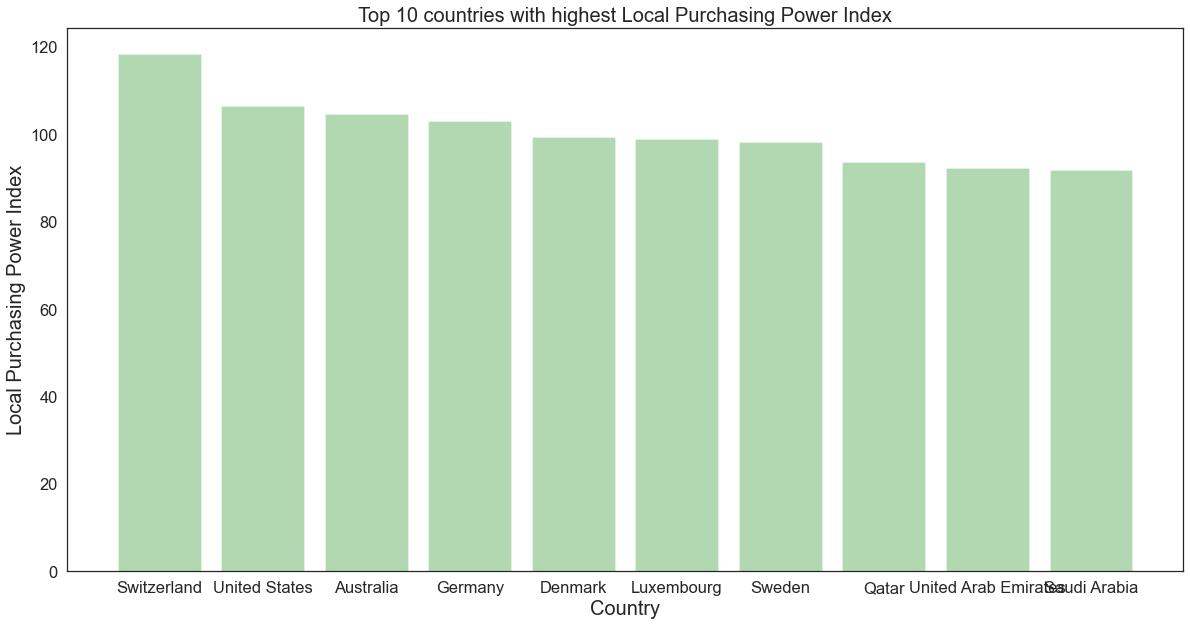

In [15]:
for column in features:
  top10 = data.nlargest(10,column)
  plt.figure(figsize=(20,10))
  sns.set(font_scale = 1.5)
  sns.set_style("white")

  plt.bar(top10['Country'], top10[column],alpha=0.3, color='green')
  plt.ylabel(column, fontsize = 20)
  plt.xlabel("Country", fontsize = 20)
  plt.title( 'Top 10 countries with highest' +' '+ column, fontsize = 20)

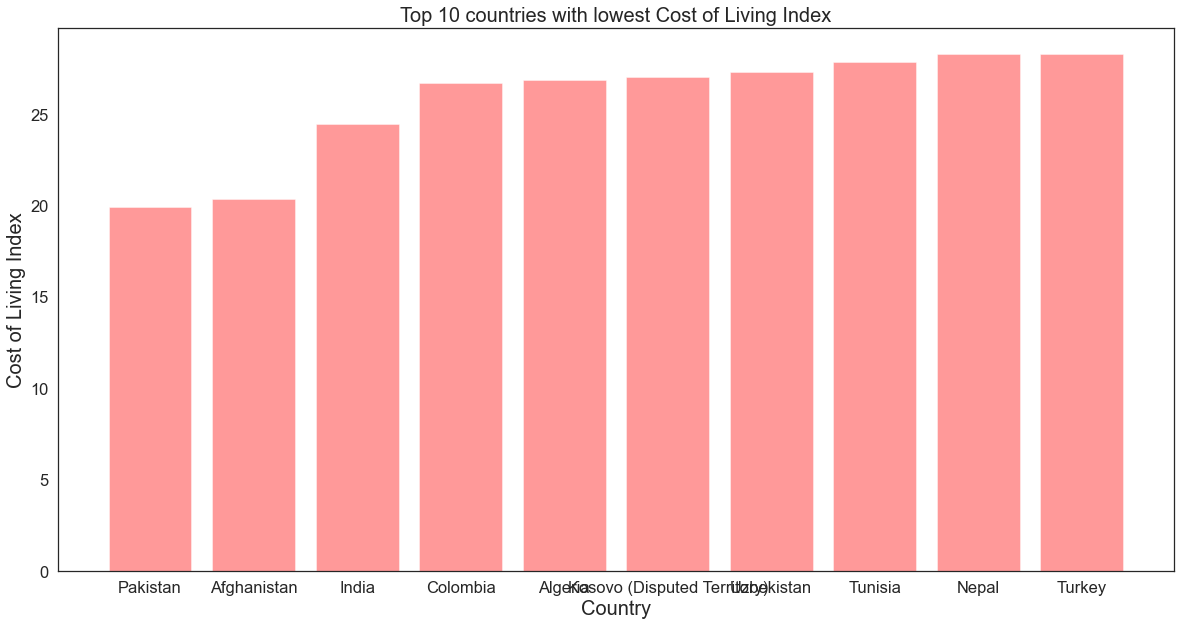

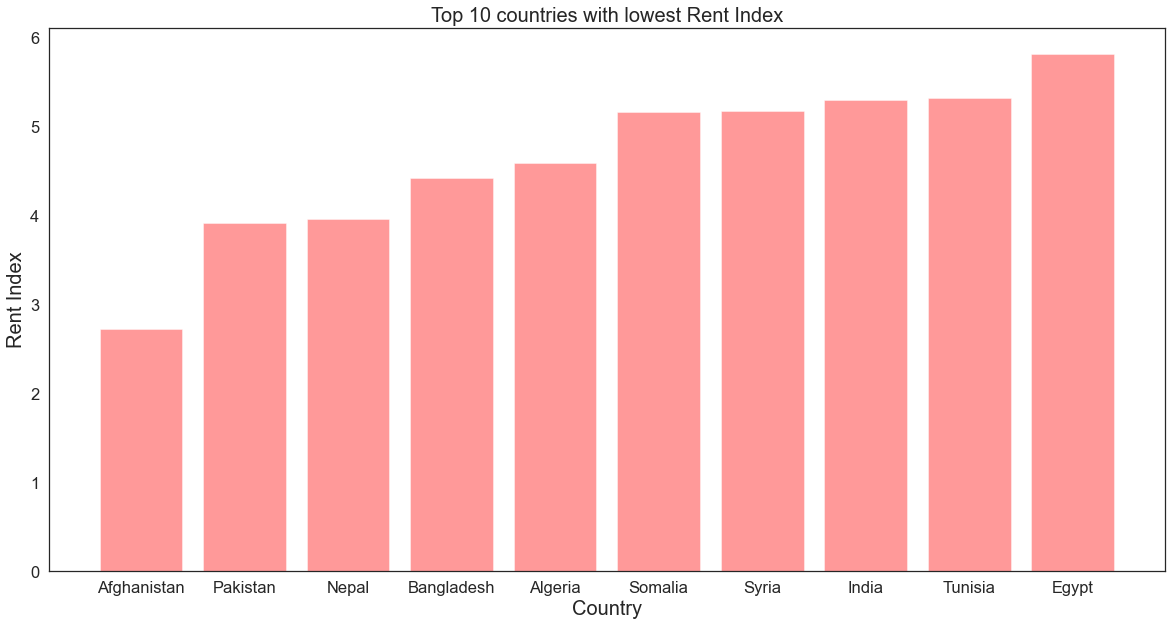

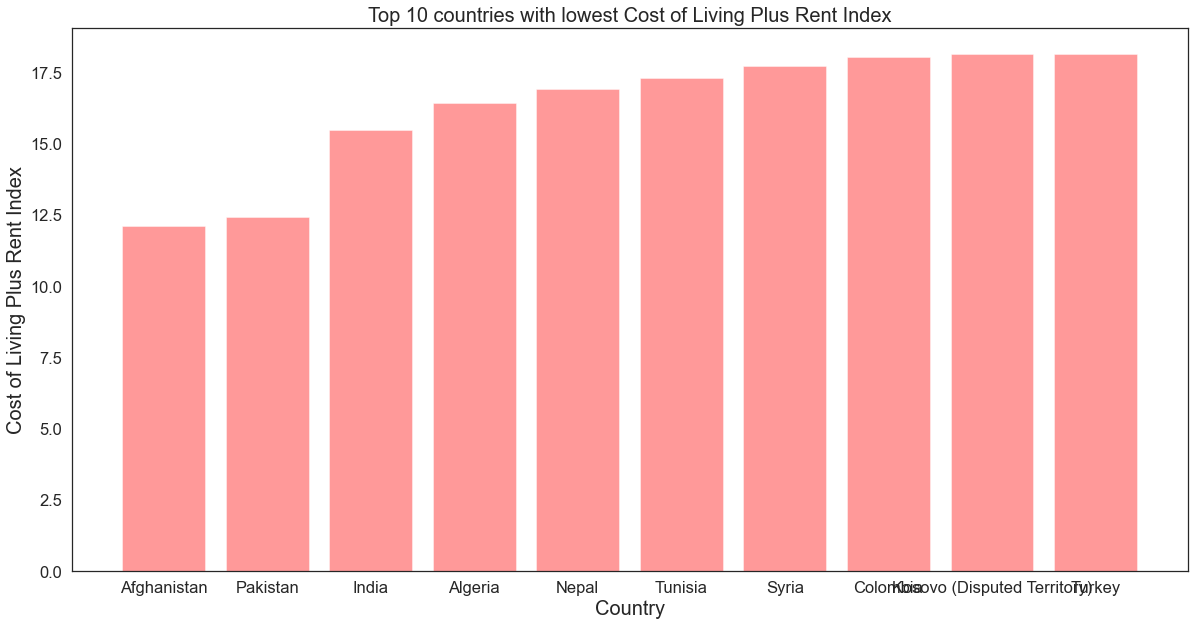

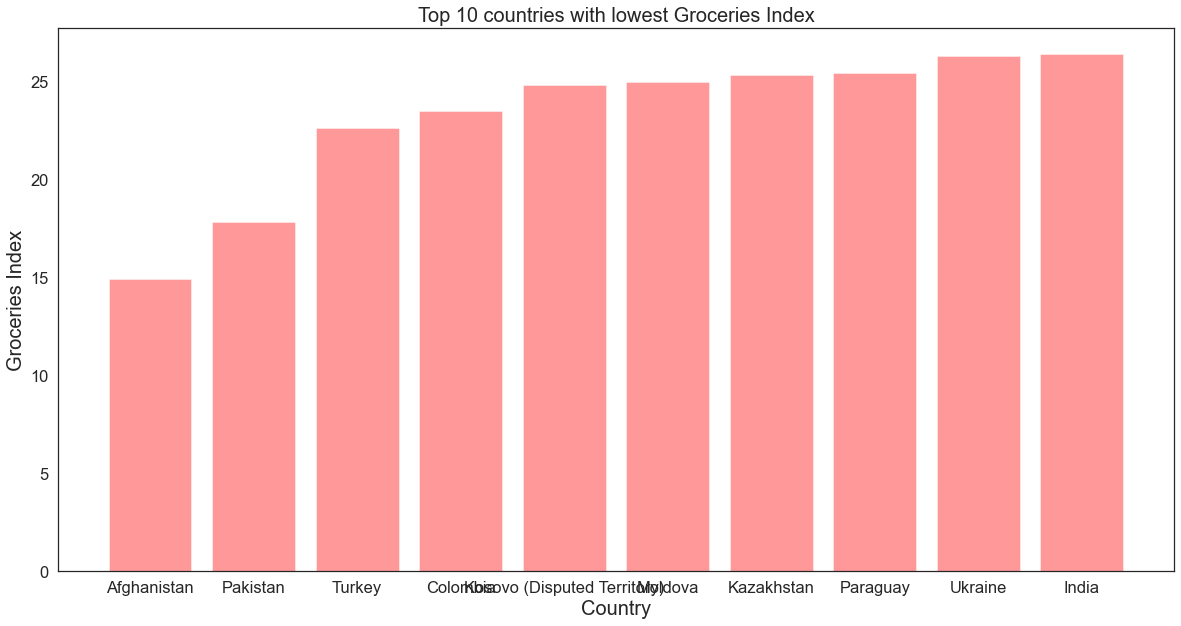

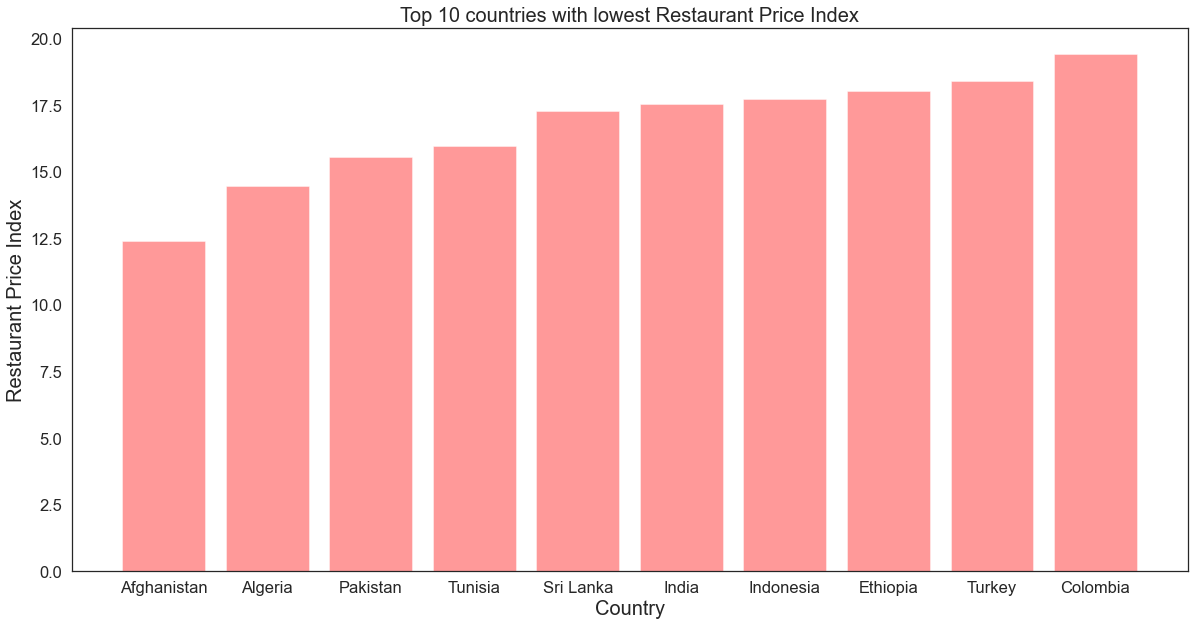

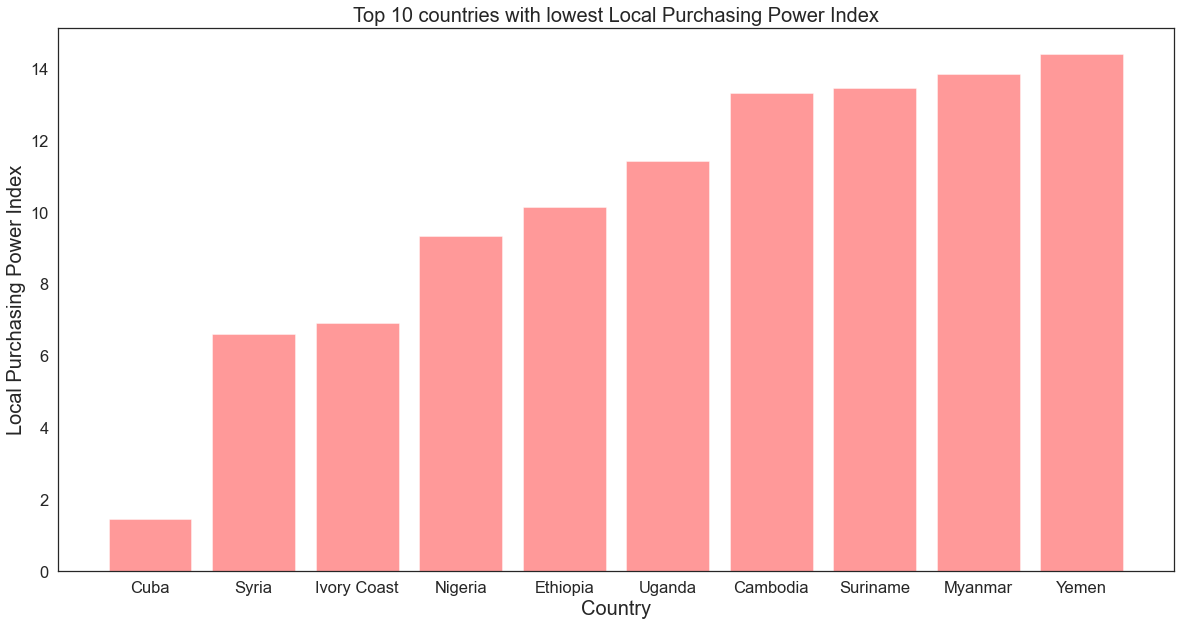

In [16]:
for column in features:
  top10 = data.nsmallest(10,column)
  plt.figure(figsize=(20,10))
  sns.set(font_scale = 1.5)
  sns.set_style("white")
  plt.bar(top10['Country'], top10[column],alpha=0.4, color='red')
  plt.ylabel(column, fontsize = 20)
  plt.xlabel("Country", fontsize = 20)
  plt.title( 'Top 10 countries with lowest' +' '+ column, fontsize = 20)

### Checking the relationship between features

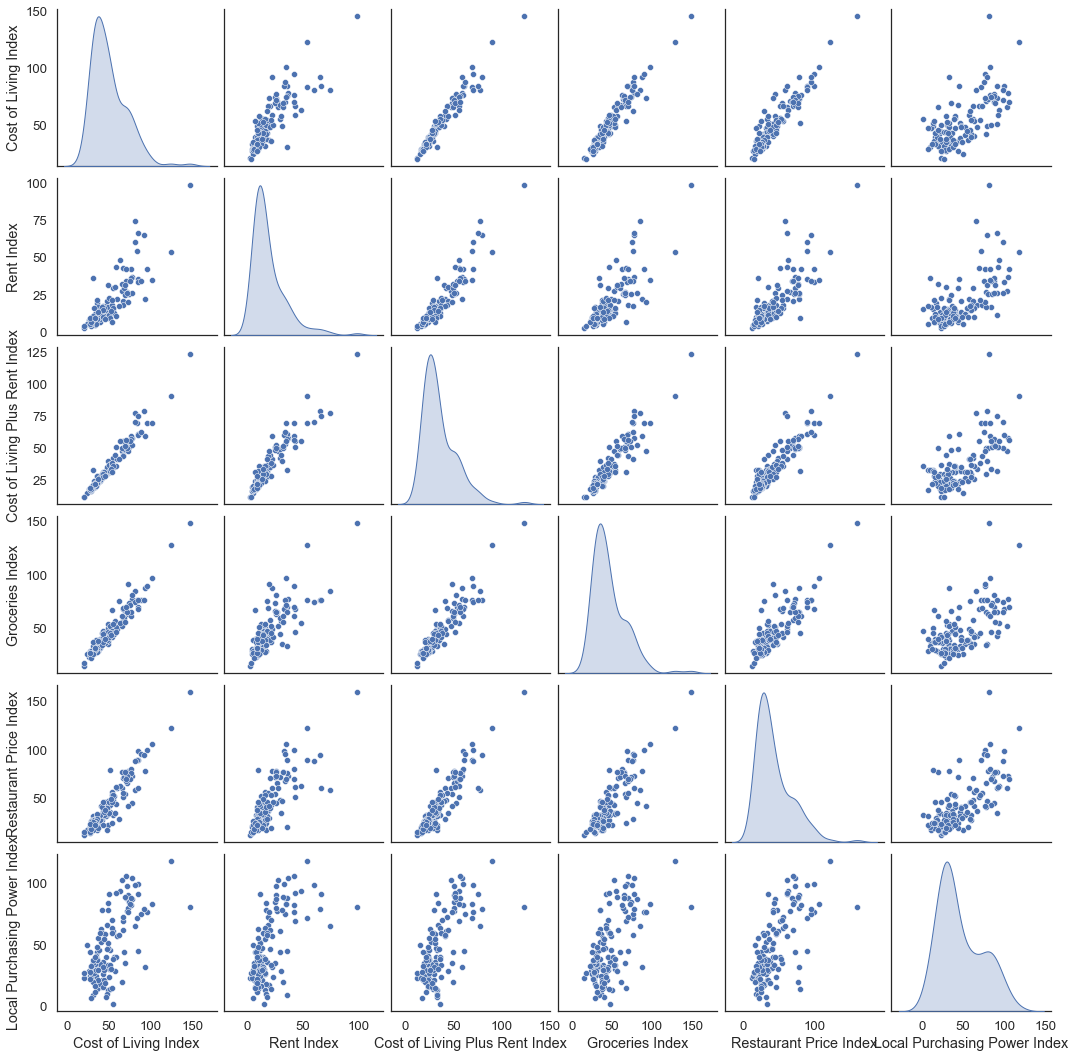

In [17]:
sns.set()
sns.set(font_scale = 1.2)
sns.set_style("white")
sns.pairplot(data[features], diag_kind='kde')

#### Outliers 

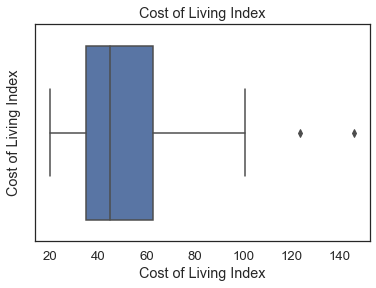

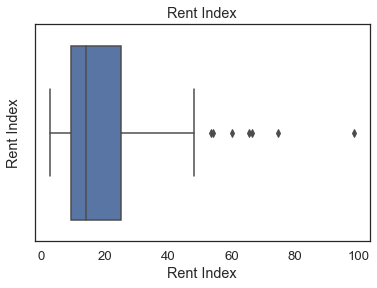

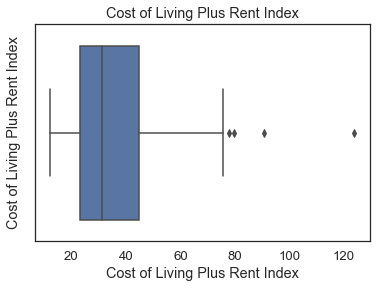

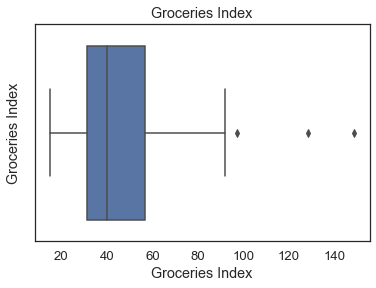

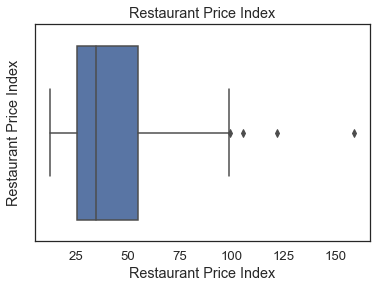

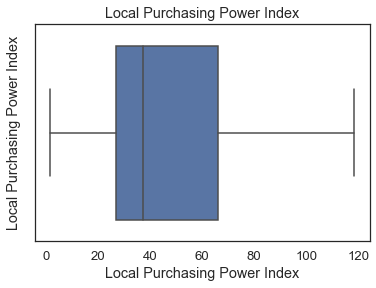

In [18]:
for feature in features:
      sns.set(font_scale = 1.2)
      sns.set_style("white")
      sns.boxplot(data[feature])
      plt.ylabel(feature)
      plt.title(feature)
      plt.show()
        

In [19]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
data = data[~((data<(Q1-1.5*IQR)) | (data>(Q3+1.5*IQR))).any(axis=1)]
data.head()

Country  Cost of Living Index  Rent Index  \
0  Afghanistan                 20.37        2.72   
1      Albania                 35.50        8.47   
2      Algeria                 26.87        4.59   
3    Argentina                 34.69        7.71   
4      Armenia                 33.89       11.61   

   Cost of Living Plus Rent Index  Groceries Index  Restaurant Price Index  \
0                           12.09            14.92                   12.41   
1                           22.83            29.32                   25.82   
2                           16.43            28.82                   14.48   
3                           22.04            28.17                   33.32   
4                           23.45            27.59                   30.55   

   Local Purchasing Power Index  
0                         23.04  
1                         30.19  
2                         24.63  
3                         30.72  
4                         28.86

In [20]:
### Visualization of Cost of living Index across the Globe

In [21]:
import plotly.graph_objects as go
import pandas as pd

dat=data

fig = go.Figure(data=go.Choropleth(
    locations = dat['Country'],
    locationmode='country names',
    z = dat['Cost of Living Index'],
    text = dat['Country'],
    colorscale = 'RdYlGn',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='black',
    marker_line_width=0.7,
    colorbar_tickprefix = '',
    colorbar_title = 'Cost of Living Index',
))

fig.update_layout(
    title_text='Cost of Living across the Globe',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=0.5,
        y=0.1,
        xref='paper',
        yref='paper',
        text='Source: <a href="https://www.cia.gov/library/publications/the-world-factbook/fields/2195.html">\
            CIA World Factbook</a>',
        showarrow = False
    )]
)

fig.show()

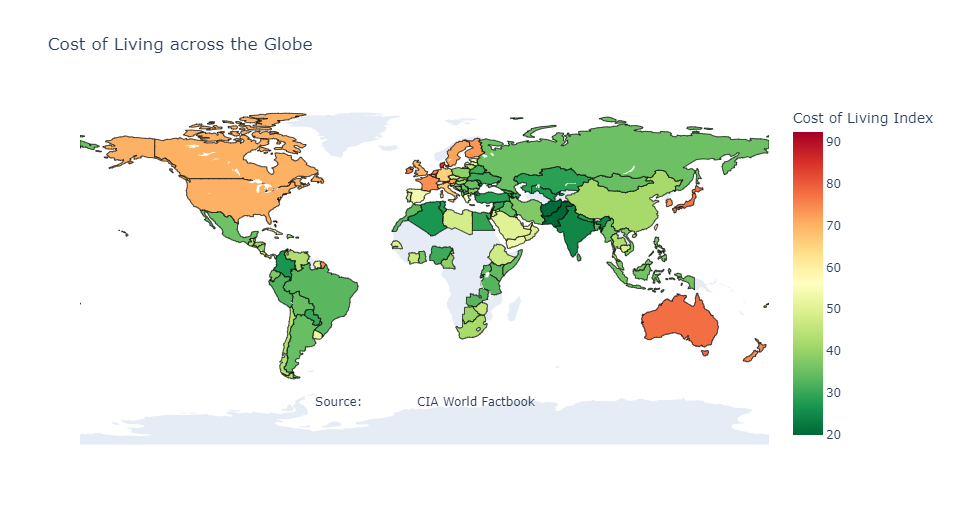

#### Correlation Matrix

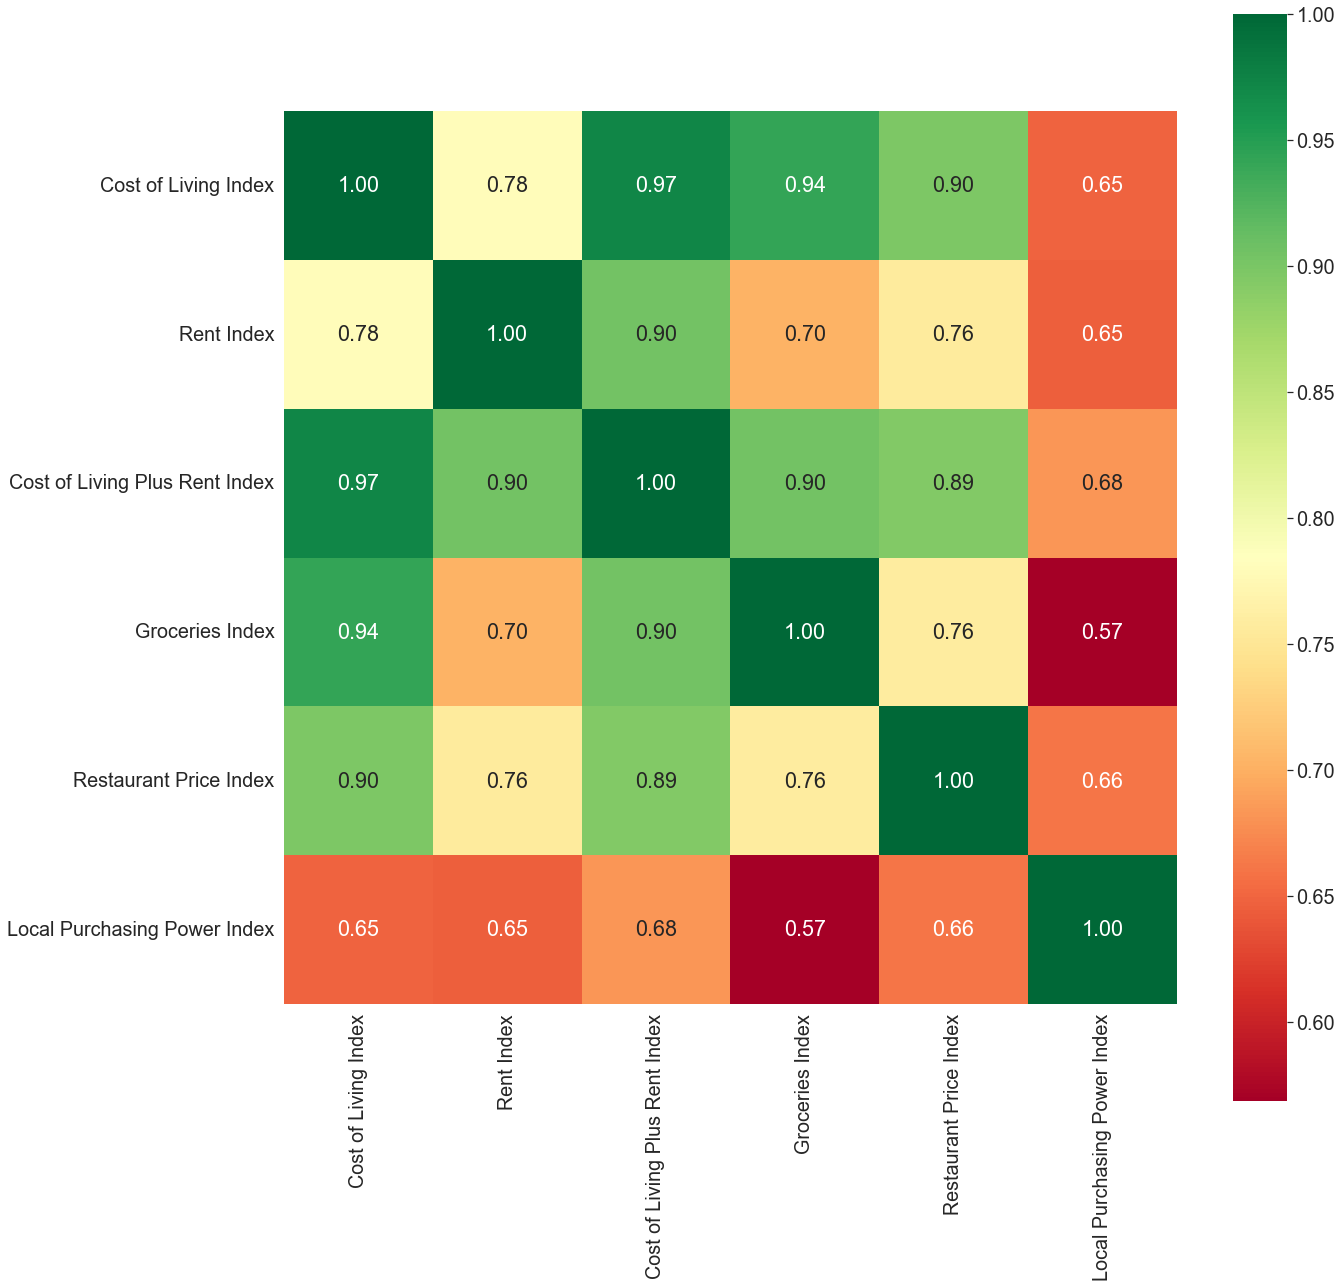

In [22]:
#X_data=data.drop('Cost of Living Index', axis=1)
cormatrix = data.corr()
plt.figure(figsize=(20, 20))
sns.set(font_scale = 1.8)
sns.heatmap(cormatrix,  annot=True,
              fmt='.2f', square=True, cmap='RdYlGn')
plt.show();

####  
1. All variable are positively correlated to each other. 
2. Cost of living index tends to be highly positively correlated with cost of living and rent, grocery, and restaurant price indices


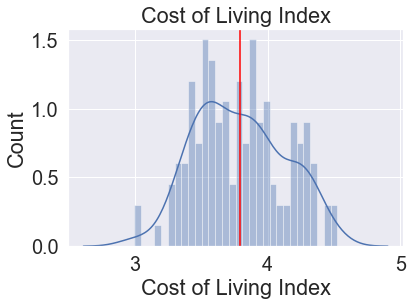

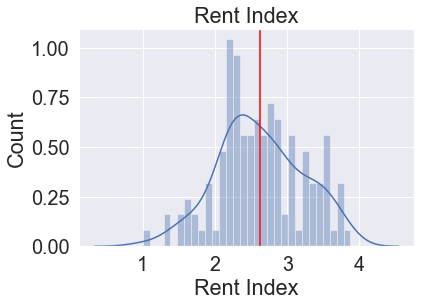

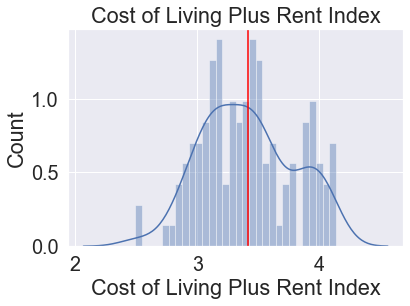

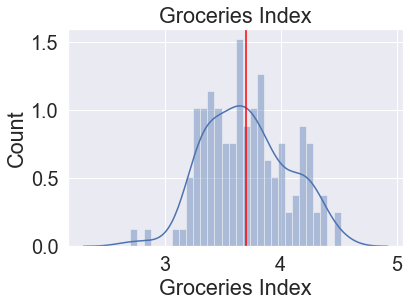

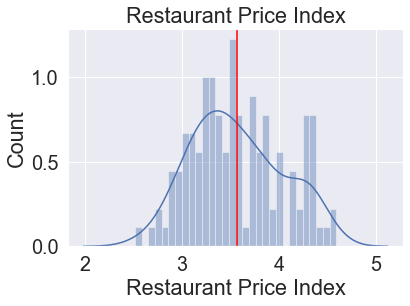

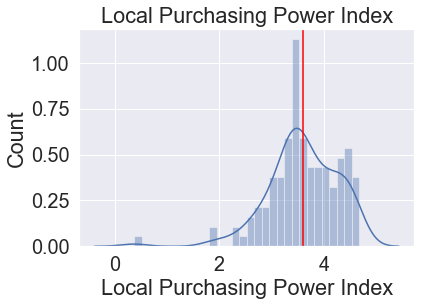

In [23]:
for feature in features:
    data[feature]=np.log(data[feature])
    sns.distplot(data[feature], bins=30)
    plt.axvline(data[feature].mean(), 
            color='red')
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()
    

In [24]:
data.head()

Country  Cost of Living Index  Rent Index  \
0  Afghanistan              3.014063    1.000632   
1      Albania              3.569533    2.136531   
2      Algeria              3.291010    1.523880   
3    Argentina              3.546451    2.042518   
4      Armenia              3.523120    2.451867   

   Cost of Living Plus Rent Index  Groceries Index  Restaurant Price Index  \
0                        2.492379         2.702703                2.518503   
1                        3.128075         3.378270                3.251149   
2                        2.799109         3.361070                2.672768   
3                        3.092859         3.338258                3.506158   
4                        3.154870         3.317453                3.419365   

   Local Purchasing Power Index  
0                      3.137232  
1                      3.407511  
2                      3.203965  
3                      3.424914  
4                      3.362457

#### Feature Selection

In [25]:
y=data['Cost of Living Index']
x=data.drop(['Country','Cost of Living Index'],axis=1)

In [26]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(x, y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [27]:
feature_sel_model.get_support()

array([False,  True,  True,  True, False])

In [28]:
selected_feat = x.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((x.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(feature_sel_model.estimator_.coef_ == 0)))

total features: 5
selected features: 3
features with coefficients shrank to zero: 2


In [29]:
selected_feat

Index(['Cost of Living Plus Rent Index', 'Groceries Index',
       'Restaurant Price Index'],
      dtype='object')

In [30]:
X=x[selected_feat]
X.head()

Cost of Living Plus Rent Index  Groceries Index  Restaurant Price Index
0                        2.492379         2.702703                2.518503
1                        3.128075         3.378270                3.251149
2                        2.799109         3.361070                2.672768
3                        3.092859         3.338258                3.506158
4                        3.154870         3.317453                3.419365

#### Split train and test data 

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=20)

In [32]:
#import regressor
from sklearn.model_selection import  KFold, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error
from xgboost import XGBRFRegressor, XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

### Linear Regression, Random Forest Regressor and XGBOOST Regressor

In [33]:
lin_reg=LinearRegression()


In [34]:
rf = RandomForestRegressor(n_estimators = 6000, max_features = 'sqrt', max_depth = 7, random_state = 18)

In [35]:
xgb = XGBRegressor(learning_rate=0.01,n_estimators=4000, max_depth=3, min_child_weight=0, gamma=0, subsample=0.7,
                                     colsample_bytree=0.7, objective='reg:squarederror', nthread=-1,
                                     scale_pos_weight=1, seed=27, reg_alpha=0.0006)

In [36]:
models= [lin_reg, xgb, rf]

In [37]:
for m in models:
    m.fit(X_train, y_train)
    y_pred_m = m.predict(X_test)
    score_m=np.sqrt(-cross_val_score(m, x, y, scoring='neg_mean_squared_error', cv=5))
    print(f'model: {str(m)}', '\n')
    print("Model Score RMSE: {:.4f} {:.4f}".format(score_m.mean(), score_m.std()))
    print(f'RMSE: {mean_squared_error(y_test,y_pred_m)}')
    print(f'MAE: {mean_absolute_error(y_test, y_pred_m)}')
    print(f'R2score: {r2_score(y_test,y_pred_m)*100}')
    print('\n','********************************'*2, '\n')

model: LinearRegression() 

Model Score RMSE: 0.0294 0.0108
RMSE: 0.003164033998311454
MAE: 0.046133429647698884
R2score: 97.8013223225473

 **************************************************************** 

model: XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=3, min_child_weight=0, missing=nan,
             monotone_constraints='()', n_estimators=4000, n_jobs=8, nthread=-1,
             num_parallel_tree=1, predictor='auto', random_state=27,
             reg_alpha=0.0006, reg_lambda=1, scale_pos_weight=1, seed=27,
             subsample=0.7, tree_method='exact', validate_parameters=1,
             verbosity=None) 

Model Score RMSE: 0.0599 0.0174
RMSE: 0.002509377185445516
MAE: 0.04276014371038118
R2score: 98.25624136627718

 ***